## NLP Class Final Project Read Data

In [1]:
!pip install pandarallel pyLDAvis

In [29]:
pip install wordcloud


python(14064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from textblob import TextBlob
import string
from nltk import download
import multiprocessing
import warnings
warnings.filterwarnings("ignore")
from pandarallel import pandarallel
import pickle
from gensim.models import LdaMulticore
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import nltk
from nltk.tokenize import word_tokenize
from multiprocessing import Pool
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from textblob.sentiments import NaiveBayesAnalyzer
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
download('stopwords')
download('wordnet')
nltk.download('punkt')


stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
pyLDAvis.enable_notebook()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)


/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyusungchokyusungcho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kyusungchokyusungcho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kyusungchokyusungcho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [5]:
!pip install pyarrow


In [6]:
pip install fastparquet


Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install --upgrade pandas

In [6]:
import pandas as pd


news_df = pd.read_parquet('https://storage.googleapis.com/msca-bdp-data-open/news_final_project/news_final_project.parquet', engine='pyarrow')


news_df.shape



/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py:706: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


(200435, 5)

In [7]:
news_df.head()

,url,date,language,title,text
0,http://galusaustralis.com/2020/02/486473/legaltech-artificial-intelligence-market-2019-technology-advancement-and-future-scope-casetext-inc-catalyst-repository-systems-ebrevia/,2020-02-26,en,"LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope – Casetext Inc., Catalyst Repository Systems, eBREVIA – Galus Australis","LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope – Casetext Inc., Catalyst Repository Systems, eBREVIA – Galus Australis \n\nGalus Australis\n\nBusinessGeneral NewsHealthcareIndustryInternationalLifestyleSci-Tech\n\nWednesday, February 26 2020\n\nTrending\n\nNeedle Counters Market Comprehensive Study by Companies Medline Industries, Boen Healthcare\nSkin Scrub Trays Market Comprehensive Study by Companies Medline Industries, BD, Deroyal\nGlobal P..."
1,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,2020-02-27,en,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament,"\nChildren With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament\n \n\nSkip to content\n\t\t\tThursday, February 27, 2020\t\t\n\nLatest:\n\n\nMansplaining in conferences: How can we get him to forestall?\n\n\nDrax power station to cease burning coal in March 2021\n\n\nCoronavirus Could Explode in the U.S. Overnight Like it Did in Italy\n\n\nCoronavirus: Dettol sales surge as markets fall again\n\n\nLevi Strauss marks the next phase in cor..."
2,http://www.agoravox.it/Covid-19-un-messaggio-dai.html,2020-03-13,en,Covid-19: un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia,\n\n\nCovid-19: un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia\n\nAccedi\n\nPartecipa ad AgoraVox!\nIscriviti e proponi un articolo\nHome page\n\n\nAttualitÃ \n\n\nAmbiente\nCronaca\nCronaca Locale\nCultura\nEconomia\nEuropa\nMedia\nIstruzione\nMondo\nPolitica\nSalute\nReligione\nSocietÃ \nScienza e Tecnologia\nTribuna Libera\n\n\tDi' la tua\n\n\nTempo Libero\n\n\nGossip\nRedazionali\nConcorsi\nCinema\nFame&Tulipani\nIncredibile ma vero!\nLa vignetta del giorno...
3,http://www.desototimes.com/news/child-actor-claude-jarman-jr-looks-back-on-his-movie-career-during-the-golden-days/article_0b310fae-e767-11ec-982e-a380305dda2f.html,2022-06-09,en,Child actor Claude Jarman Jr. looks back on his movie career during the “Golden Days” of Hollywood | News | desototimes.com,\nChild actor Claude Jarman Jr. looks back on his movie career during the “Golden Days” of Hollywood | News | desototimes.com\nSkip to main content\n\nYou have permission to edit this article.\n\n Edit\nClose\n\nHome\nNews\n\n\nNews\n\nLocal News\n\nFaith & Worship\n\n\nBusiness\nSports\n\n\nSports\n\nLocal Sports\n\nOutdoor Report\n\nOpinion\n\n\nOpinion\n\nLetters to the Editor\n\nSubmit a Letters to the Editor\n\n\nObituaries\nLifestyle\n\n\nLifestyle\n\nFeatures\n\nCommunity Calendar\n\n...
4,http://www.millenniumpost.in/big-stories/ai-express-aircraft-skids-off-runaway-in-kozhikode-rescue-ops-on-414926,2020-08-07,en,Two dead as AI Express flight skids off Kozhikode airport,Two dead as AI Express flight skids off Kozhikode airportTopLoginSubscribeToggle navigationFeaturesDelhiKolkataNationOpinionEditorialBusinessSportsSunday PostBeyond BygoneEpic PowerIn RetrospectGlobal EyeInlandRoutesBeaconInsightGame OnSafariTrendingCandid TalkGastronomyFact FilesMapping the states of IndiaX/sunday-post/beyond-bygone/sunday-post/epic-power/fact-files/ians-feeds/sundaypost/in-retrospect/mapping-the-states-of-india/puja-special/Reminiscence/sponsored/sundaypost/global-eye/feat...


In [8]:
print(news_df['text'].head())

0    LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope – Casetext Inc., Catalyst Repository Systems, eBREVIA – Galus Australis          \n\nGalus Australis\n\nBusinessGeneral NewsHealthcareIndustryInternationalLifestyleSci-Tech\n\nWednesday, February 26 2020\n\nTrending\n\nNeedle Counters Market Comprehensive Study by Companies Medline Industries, Boen Healthcare\nSkin Scrub Trays Market Comprehensive Study by Companies Medline Industries, BD, Deroyal\nGlobal P...
1    \nChildren With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament\n \n\nSkip to content\n\t\t\tThursday, February 27, 2020\t\t\n\nLatest:\n\n\nMansplaining in conferences: How can we get him to forestall?\n\n\nDrax power station to cease burning coal in March 2021\n\n\nCoronavirus Could Explode in the U.S. Overnight Like it Did in Italy\n\n\nCoronavirus: Dettol sales surge as markets fall again\n\n\nLevi Strauss marks the next phase 

In [9]:
unique_news_df = news_df.drop_duplicates(subset='text')

number_of_unique_rows = unique_news_df.shape[0]

print(f"Number of unique rows based on the 'text' column: {number_of_unique_rows}")


Number of unique rows based on the 'text' column: 199735


In [10]:
news_df = news_df.drop_duplicates(subset='text')
news_df.shape

(199735, 5)

In [11]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemma = WordNetLemmatizer()

# Define the list of keywords to keep in titles
keywords = [
    'ai', 'artificial intelligence', 'llm', 'large language models', 'conversational ai', 'openai', 'chatgpt',
    'gpt', 'gpt-3', 'gpt-4', 'bard', 'google bard', 'llama', 'chatbot', 'transformer', 'bert', 'roberta', 't5', 'ernie',
    'machine learning', 'deep learning', 'data science', 'neural networks', 'nlp', 'natural language processing',
    'intelligent systems', 'cognitive computing', 'reinforcement learning', 'computer vision', 'text generation',
    'pretrained models', 'language model', 'deepfake', 'autonomous', 'robotics', 'robots', 'algorithm', 'analytics',
    'data mining', 'predictive modeling', 'supervised learning', 'unsupervised learning', 'neural net',
    'deep neural networks', 'convolutional neural networks', 'recurrent neural networks', 'ai ethics', 'bias in ai',
    'ai fairness', 'ai transparency', 'quantum computing', 'augmented reality', 'virtual reality', 'blockchain',
    'edge computing', 'internet of things', 'iot', 'big data', 'data analytics', 'smart technology', 'cybersecurity',
    'biometrics', 'fintech', 'tech innovation', 'digital transformation', 'cloud computing', 'automation',
    'machine vision', 'natural language understanding', 'natural language generation', 'sentiment analysis',
    'facial recognition', 'speech recognition', 'text-to-speech', 'tts', 'speech-to-text', 'stt', 'chatbots',
    'virtual assistants', 'voice assistants', 'deep reinforcement learning', 'generative adversarial networks', 'gans',
    'federated learning', 'transfer learning', 'meta learning', 'few-shot learning', 'zero-shot learning',
    'self-supervised learning', 'semantic analysis', 'knowledge graph', 'data visualization', 'model interpretability',
    'explainable ai', 'xai', 'human-in-the-loop', 'augmented intelligence', 'synthetic data'
]

# Define the list of keywords to remove from texts
keywords_to_remove = [
    "Log In", "Sign Up", "Subscribe", "Read More", "Advertisement", "Privacy Policy", "Cookie Policy",
    "Terms of Use", "Terms and Conditions", "Search", "Menu", "Skip to content", "Footer", "Top", "Back to top",
    "Scroll down", "All Rights Reserved", "Copyright", "Copyright ©", "©", "Trademark", "Patent",
    "All rights reserved", "Copyright Notice", "Share", "Tweet", "Follow us", "Like", "Share on Facebook",
    "Tweet on Twitter", "Comments", "No Comments", "Add a Comment", "Post a Comment", "Leave a Reply",
    "Leave a Comment", "Newsletter", "Subscribe to our newsletter", "Print", "Print this page", "Download",
    "Download PDF", "Citation", "Site Map", "Feedback", "Contact Us", "FAQ", "Frequently Asked Questions", "Help",
    "Customer Service", "Next", "Previous", "Page 1", "Page 2", "Related Articles", "Related Posts", "Read Next",
    "Recommended"
]

def keyword_in_title(title):
    title = title.lower()
    return any(keyword in title for keyword in keywords)

def clean_text_data(text, keywords_to_remove):
    # Common cleaning steps
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'<script[^>]*>([\S\s]*?)<\/script>', '', text)
    text = re.sub(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[–]', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    MIN_WORD_LENGTH = 2
    MAX_WORD_LENGTH = 20
    tokens = [token for token in tokens if token.isalpha() and
              MIN_WORD_LENGTH <= len(token) <= MAX_WORD_LENGTH and
              token not in stop_words]
    
    tokens = [lemma.lemmatize(token.lower()) for token in tokens]
    
    clean_text = ' '.join(tokens)
    for phrase in keywords_to_remove:
        clean_text = clean_text.replace(phrase.lower(), '')
    
    return clean_text

# Filter the DataFrame to keep rows where the title contains any of the keywords
filtered_news_df = news_df[news_df['title'].apply(keyword_in_title)]

# Clean the text data for the remaining rows
filtered_news_df['clean_text'] = filtered_news_df['text'].apply(lambda x: clean_text_data(x, keywords_to_remove))

filtered_news_df.shape

(195330, 6)

In [12]:
filtered_news_df.head()

,url,date,language,title,text,clean_text
0,http://galusaustralis.com/2020/02/486473/legaltech-artificial-intelligence-market-2019-technology-advancement-and-future-scope-casetext-inc-catalyst-repository-systems-ebrevia/,2020-02-26,en,"LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope – Casetext Inc., Catalyst Repository Systems, eBREVIA – Galus Australis","LegalTech Artificial Intelligence Market 2019 Technology Advancement and Future Scope – Casetext Inc., Catalyst Repository Systems, eBREVIA – Galus Australis \n\nGalus Australis\n\nBusinessGeneral NewsHealthcareIndustryInternationalLifestyleSci-Tech\n\nWednesday, February 26 2020\n\nTrending\n\nNeedle Counters Market Comprehensive Study by Companies Medline Industries, Boen Healthcare\nSkin Scrub Trays Market Comprehensive Study by Companies Medline Industries, BD, Deroyal\nGlobal P...",legaltech artificial intelligence market technology advancement future scope casetext catalyst repository system ebrevia galus australis galus australis businessgeneral wednesday february trending needle counter market comprehensive study company medline industry boen healthcare skin scrub tray market comprehensive study company medline industry bd deroyal global portable handheld electronic game machine market outlook business insight apollo game sony aristocrat leisure igt infectious disea...
1,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,2020-02-27,en,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament,"\nChildren With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament\n \n\nSkip to content\n\t\t\tThursday, February 27, 2020\t\t\n\nLatest:\n\n\nMansplaining in conferences: How can we get him to forestall?\n\n\nDrax power station to cease burning coal in March 2021\n\n\nCoronavirus Could Explode in the U.S. Overnight Like it Did in Italy\n\n\nCoronavirus: Dettol sales surge as markets fall again\n\n\nLevi Strauss marks the next phase in cor...",child with autism saw their learning social skill boosted after playing with this ai robot news parliament skip content thursday february latest mansplaining conference how get forestall drax power station cease burning coal march coronavirus could explode overnight did italy coronavirus dettol sale surge market fall levi strauss mark phase corporate paid leave policy news parliament get real story news technology service healthcare world business entertainment world child with autism saw ...
2,http://www.agoravox.it/Covid-19-un-messaggio-dai.html,2020-03-13,en,Covid-19: un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia,\n\n\nCovid-19: un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia\n\nAccedi\n\nPartecipa ad AgoraVox!\nIscriviti e proponi un articolo\nHome page\n\n\nAttualitÃ \n\n\nAmbiente\nCronaca\nCronaca Locale\nCultura\nEconomia\nEuropa\nMedia\nIstruzione\nMondo\nPolitica\nSalute\nReligione\nSocietÃ \nScienza e Tecnologia\nTribuna Libera\n\n\tDi' la tua\n\n\nTempo Libero\n\n\nGossip\nRedazionali\nConcorsi\nCinema\nFame&Tulipani\nIncredibile ma vero!\nLa vignetta del giorno...,un messaggio dai ricercatori italiani ai colleghi stranieri agoravox italia accedi partecipa ad agoravox iscriviti proponi un articolo home page attualit ambiente cronaca cronaca locale cultura economia europa medium istruzione mondo politica salute religione societ scienza tecnologia tribuna libera di la tua tempo libero gossip redazionali concorsi cinema fame tulipani incredibile vero la vignetta del giorno moda tendenze pubblicazioni agoravox recensioni satira musica spettacoli sport viag...
4,http://www.millenniumpost.in/big-stories/ai-express-aircraft-skids-off-runaway-in-kozhikode-rescue-ops-on-414926,2020-08-07,en,Two dead as AI Express flight skids off Kozhikode airpor

INFO: Pandarallel will run on -1 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


python(2114) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2116) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2118) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2204) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(2210) MallocStackLoggin

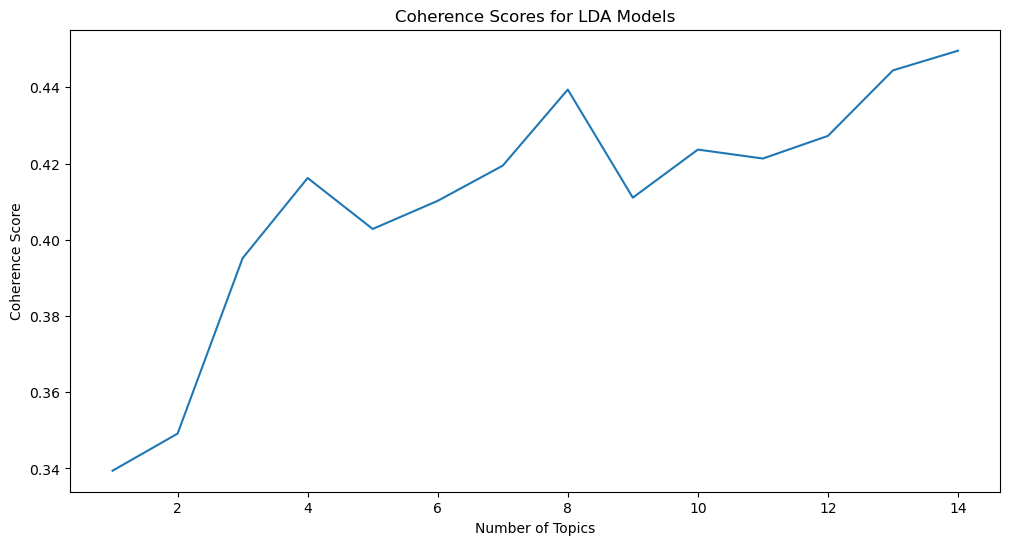

The optimal number of topics based on coherence score is: 14


python(7181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7187) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7189) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7191) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7201) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7203) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [13]:
import pandas as pd
import gensim
from gensim.models import Phrases
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from multiprocessing import cpu_count
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import string
# Initialize pandarallel
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=-1)  # Adjust the number of workers as needed

news_df_sample = filtered_news_df.sample(frac=1.0, random_state=42)

def tokenize(text):
    text = text.lower()  # convert text to lower-case
    text = re.sub(f'[{string.punctuation}]', '', text)  # strip punctuation
    return word_tokenize(text)

news_df_sample['tokens'] = news_df_sample['clean_text'].apply(tokenize)

# Create bigrams and trigrams
bigram_mod = Phrases(news_df_sample['tokens'], min_count=5, threshold=100)
trigram_mod = Phrases(bigram_mod[news_df_sample['tokens']], threshold=100)

# Form trigrams
def make_trigrams(tokens):
    return trigram_mod[bigram_mod[tokens]]

news_df_sample['trigrams'] = news_df_sample['tokens'].apply(make_trigrams)

# Remove stopwords
stop_words = set(stopwords.words('english'))
news_df_sample['trigrams'] = news_df_sample['trigrams'].apply(lambda x: [word for word in x if word not in stop_words])

# Build the dictionary and corpus
dictionary = Dictionary(news_df_sample['trigrams'])
corpus = [dictionary.doc2bow(text) for text in news_df_sample['trigrams']]

# Determine the number of available CPU cores
cores = cpu_count()  # You can adjust this number to the number of available cores on your machine

# Compute coherence scores for LDA models with different numbers of topics
coherence_values = []
for num_topics in range(1, 15):
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, workers=min(cores-1, 7), passes=10, random_state=42)
    coherencemodel = CoherenceModel(model=lda_model, texts=news_df_sample['trigrams'], dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

# Plotting the coherence scores
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores for LDA Models')
plt.show()

# Finding the number of topics with the highest coherence score
best_num_topics = coherence_values.index(max(coherence_values)) + 1
print(f'The optimal number of topics based on coherence score is: {best_num_topics}')

# We can now fit the LDA model with the optimal number of topics
optimal_lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=best_num_topics, workers=min(cores-1, 7), passes=10, random_state=42)

# Add the most contributing topics per document in the DataFrame
news_df_sample['dominant_topic'] = [sorted(optimal_lda_model[corpus[i]], key=lambda x: -x[1])[0][0] for i in range(len(news_df_sample))]


## Save news_df_filtered

In [14]:
with open('filtered_news_df_pickle', 'wb')as f:
    pickle.dump(filtered_news_df, f)


In [15]:
with open('filtered_news_df_pickle', 'rb')as f:
    filtered_news_df = pickle.load(f)

In [16]:
with open('optimal_lda_model_pickle', 'wb')as f:
    pickle.dump(optimal_lda_model, f)

In [17]:
with open('news_df_sample_pickle', 'wb')as f:
    pickle.dump(news_df_sample, f)

In [18]:
with open('best_num_topics_pickle', 'wb')as f:
    pickle.dump(news_df_sample, f)

## load

In [6]:
with open('optimal_lda_model_pickle', 'rb')as f:
    olm = pickle.load(f)

In [7]:
with open('news_df_sample_pickle', 'rb')as f:
    news_df_sample = pickle.load(f)

In [8]:
with open('best_num_topics_pickle', 'rb')as f:
    best_num_topics = pickle.load(f)

In [22]:
news_df_sample.head()

,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter all sharing option all sharing option all image generated google latest ai linkedin reddit pocket flipboard email there new hot trend ai generator feed program text theyll generate remarkably accurate picture match description they match ra...,"[all, image, generated, google, latest, ai, the, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, the, verge, filed, google, all, image, generated, google, latest, ai, imagen, else, thing, by, james, vincent, may, edt, story, facebook, twitter, all, sharing, option, all, sharing, option, all, image, generated, google, latest, ai, linkedin, reddit, pocket, flipboard, email, there, new, hot, trend, ai, generator, feed, program, text, theyll, gener...","[image, generated, google, latest, ai, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, verge, filed, google, image, generated, google, latest, ai, imagen, else, thing, james_vincent, may, edt, story, facebook, twitter, sharing, option, sharing, option, image, generated, google, latest, ai, linkedin, reddit, pocket_flipboard, email, new, hot, trend, ai, generator, feed, program, text, theyll, generate, remarkably, accurate, picture, match, descr...",3
193040,https://www.newsbreak.com/news/2635308733891/mit-engineers-develop-lego-inspired-artificial-intelligence-chip-that-can-be-stacked-and-reconfigured,2022-06-17,en,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreak,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreakSign inHomeLocalHeadlinesCoronavirusOriginalRecommendEntertainmentEntertainmentCelebritiesTV & VideosMusicMoviesVisual ArtTV SeriesBooks & LiteratureComicsTheater & DanceBehind Viral VideosPerforming ArtsTV ShowsPhotographyMuseumsDesignRock MusicHip HopPoliticsPoliticsU.S. PoliticsMilitaryCongress & CourtsElectionsLawPresidential ElectionImmigrationPOTUSForeign PolicyHealthHealthP...,mit engineer develop artificial intelligence chip that can stacked reconfigured newsbreaksign arttv seriesbooks dancebehind viral videosperforming artstv musichip healthhealth servicesmental healthdiseases healthcancerfood sportspremier drinkspetsbeauty safetypublic safetyaccidentslaw enforcementtraffic advicefamily rentlabor issuestrouble scienceearth scienceeducationhigh nationsmiddle location channel ic people inin this article mit engineer spherical robot light emitting diode backlit key...,"[mit, engineer, develop, artificial, intelligence, chip, that, can, stacked, reconfigured, newsbreaksign, arttv, seriesbooks, dancebehind, viral, videosperforming, artstv, musichip, healthhealth, servicesmental, healthdiseases, healthcancerfood, sportspremier, drinkspetsbeauty, safetypublic, safetyaccidentslaw, enforcementtraffic, advicefamily, rentlabor, issuestrouble, scienceearth, scienceeducationhigh, nationsmiddle, location, channel, ic, people, inin, t

In [12]:
for i in range(14):
    words = [word for word, prob in olm.show_topic(i, topn=10)]
    print(f"Top words for topic {i}: {words}")


Top words for topic 0: ['ai', 'data', 'business', 'technology', 'security', 'use', 'new', 'news', 'u', 'digital']
Top words for topic 1: ['ai', 'data', 'customer', 'solution', 'business', 'company', 'platform', 'technology', 'cloud', 'service']
Top words for topic 2: ['ai', 'gray', 'medium', 'group', 'content', 'press', 'release', 'technology', 'company', 'platform']
Top words for topic 3: ['ai', 'news', 'u', 'public', 'people', 'new', 'say', 'program', 'one', 'chatgpt']
Top words for topic 4: ['ai', 'news', 'said', 'openai', 'company', 'new', 'technology', 'intelligence', 'artificial', 'chatgpt']
Top words for topic 5: ['news', 'u', 'ai', 'india', 'world', 'business', 'sport', 'technology', 'new', 'said']
Top words for topic 6: ['news', 'u', 'email', 'insurance', 'business', 'local', 'weather', 'car', 'facebook', 'company']
Top words for topic 7: ['stock', 'market', 'company', 'ai', 'best', 'price', 'investor', 'news', 'financial', 'nasdaq']
Top words for topic 8: ['ai', 'best', 'new'

In [24]:
topic_names = {
    0: 'AI in Business and Security',
    1: 'Customer Solutions and Cloud Technologies',
    2: 'Media and Press Technology',
    3: 'Public Engagement and Programming',
    4: 'Corporate AI Developments',
    5: 'Global Business and Technology News',
    6: 'AI in Automotive Insurance',
    7: 'Financial Markets and AI Investment',
    8: 'Entertainment and AI',
    9: 'Product and Service Innovation',
    10: 'News and Sports Broadcasting',
    11: 'Press Releases and Industry News',
    12: 'Market Intelligence and Growth Analysis',
    13: 'Health and Machine Learning'
}

news_df_sample['topic_name'] = news_df_sample['dominant_topic'].map(topic_names)

In [25]:

top_docs_per_topic = {}
for i, row_list in enumerate(optimal_lda_model[corpus]):
    row = row_list[0] if optimal_lda_model.per_word_topics else row_list            
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0:  
            top_docs_per_topic.setdefault(topic_num, []).append((i, prop_topic))



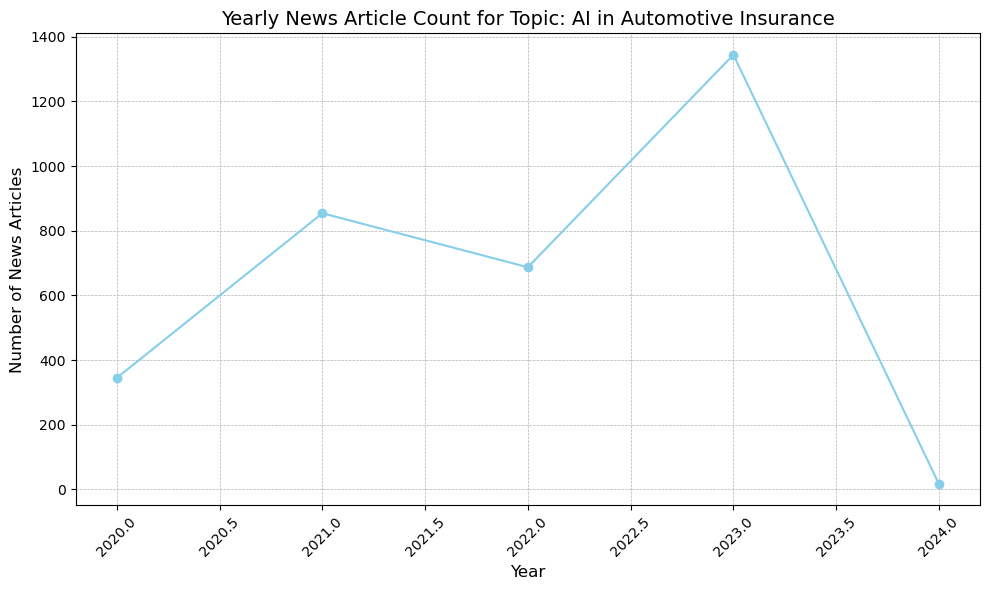

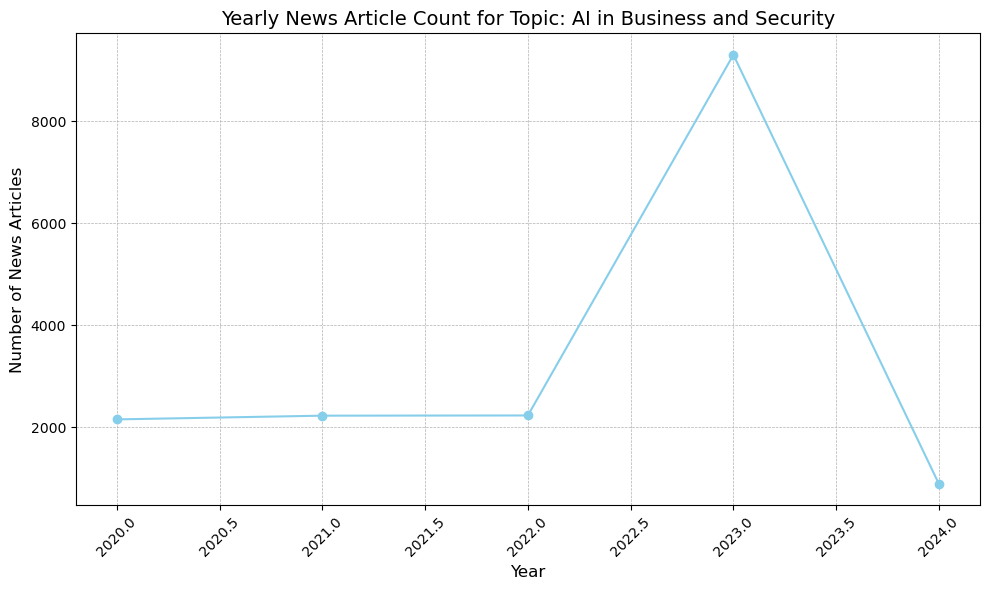

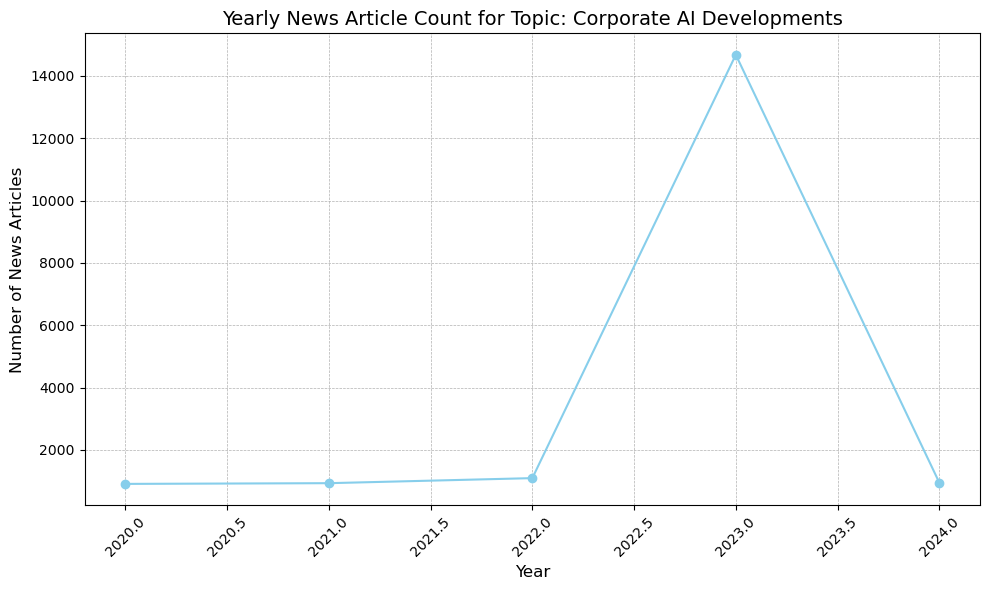

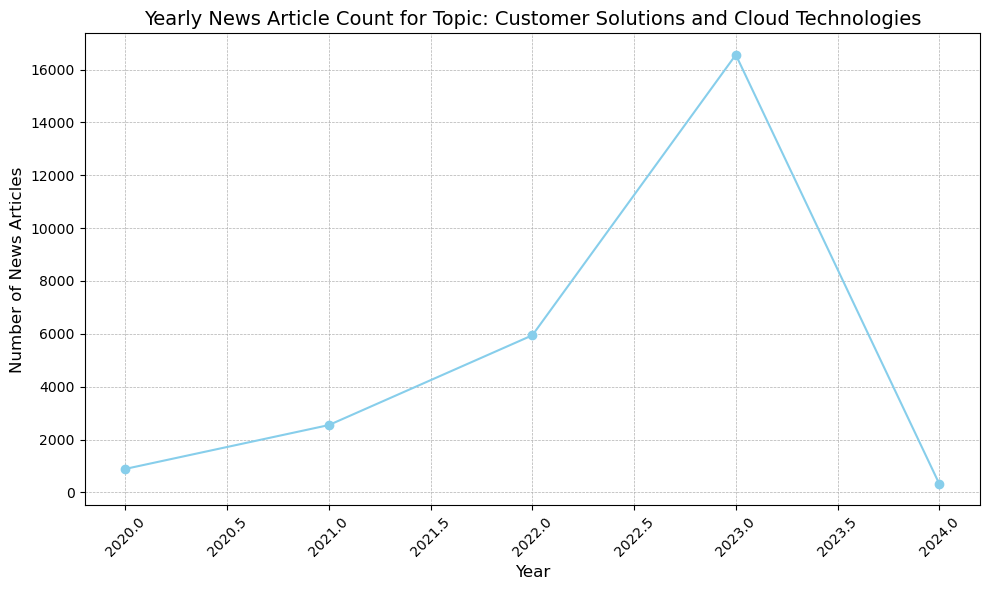

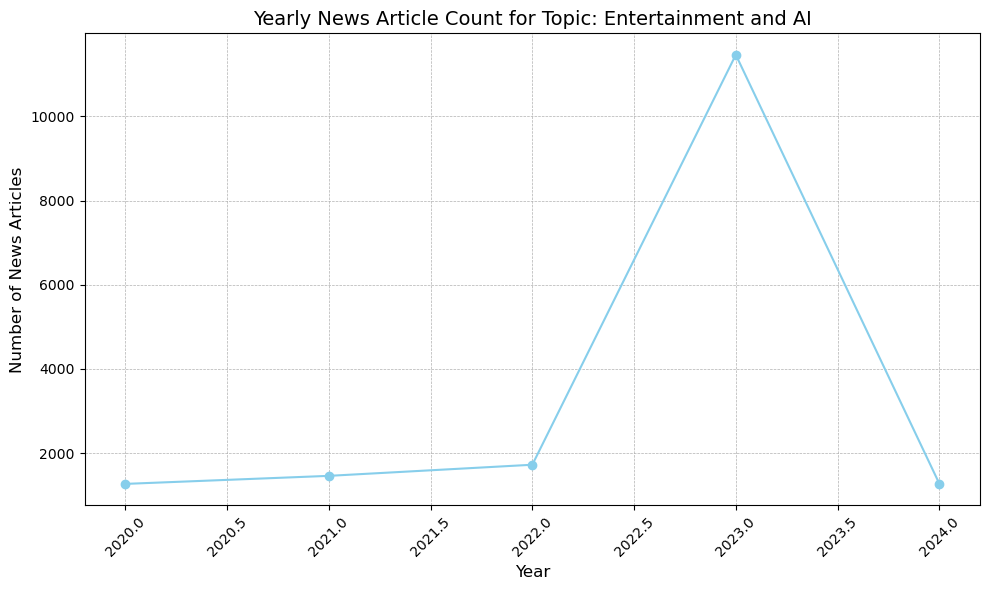

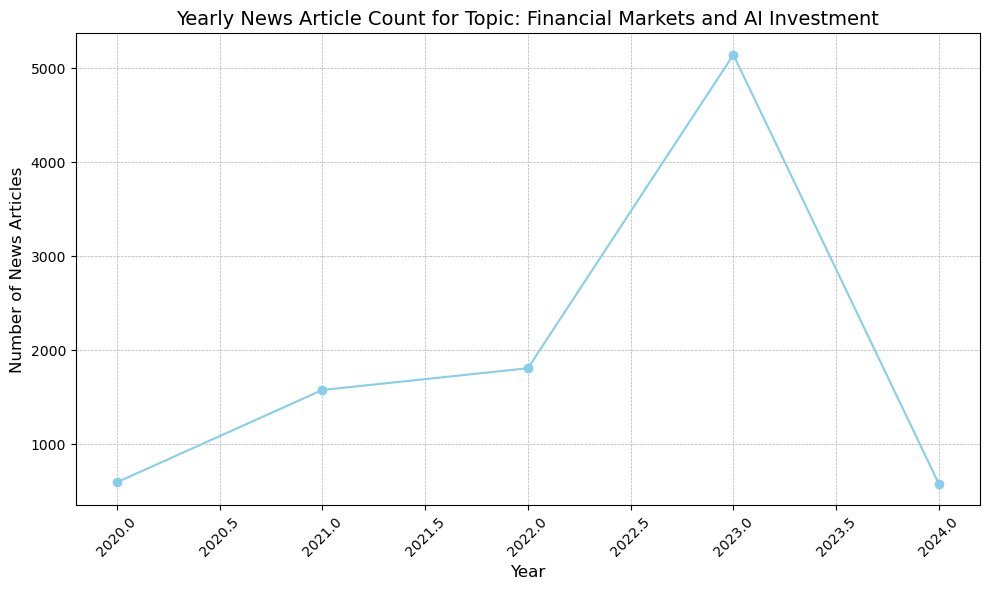

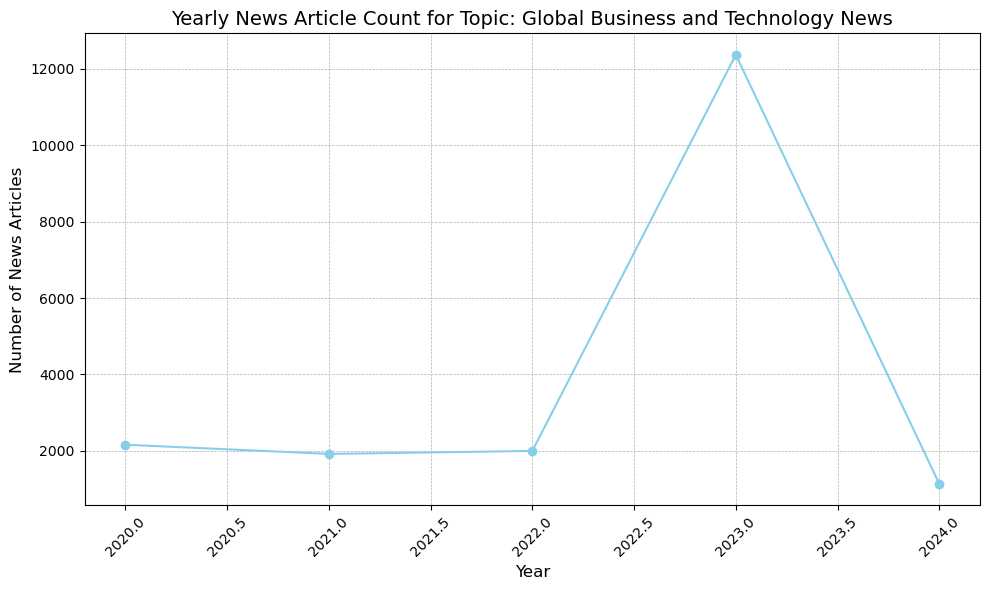

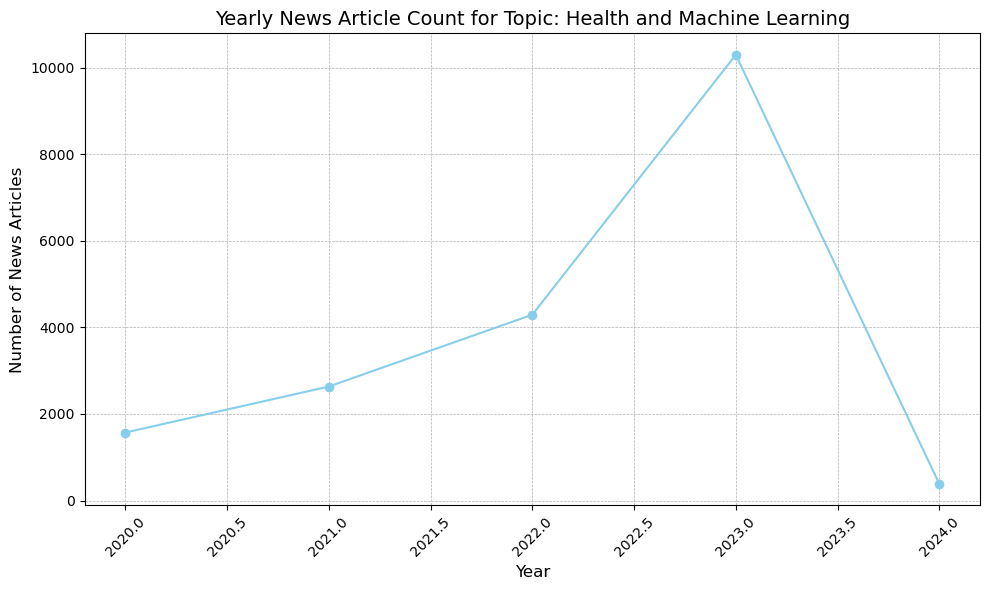

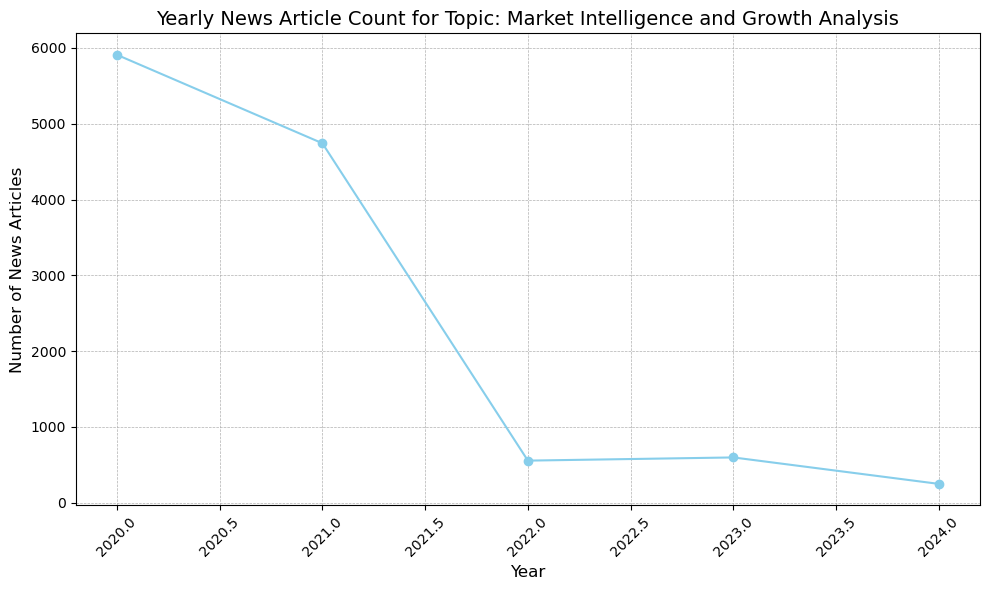

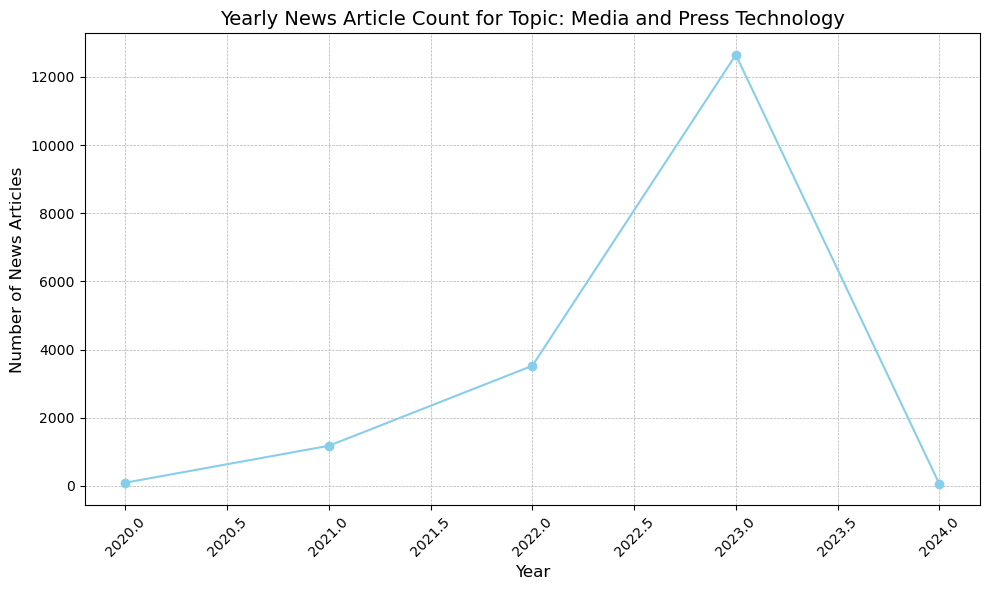

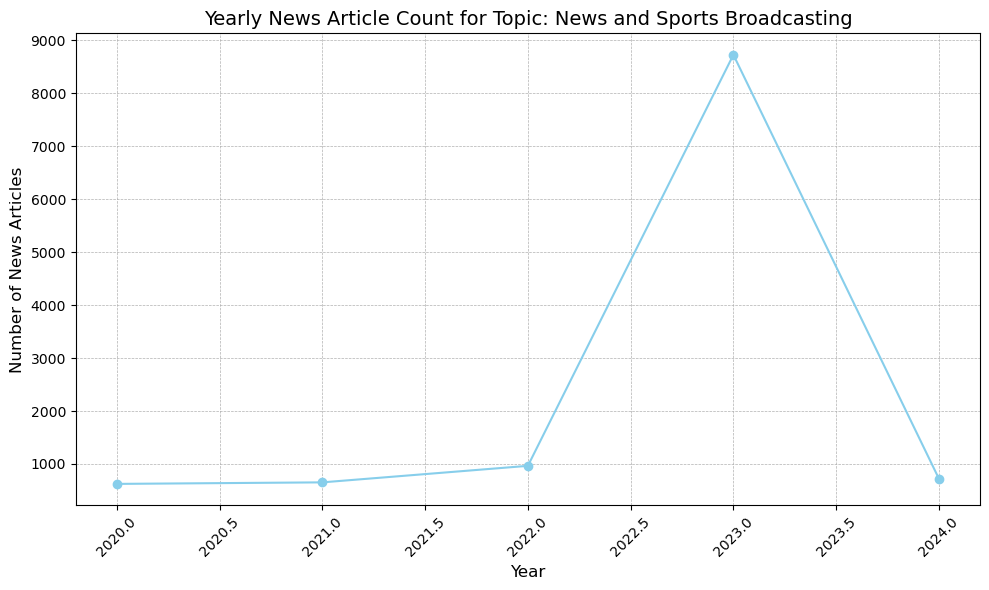

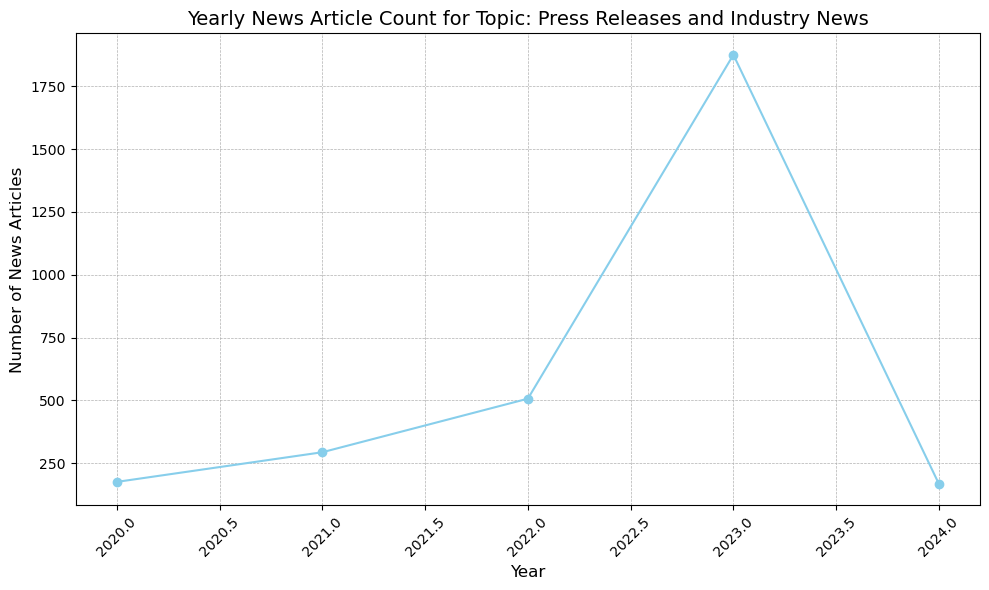

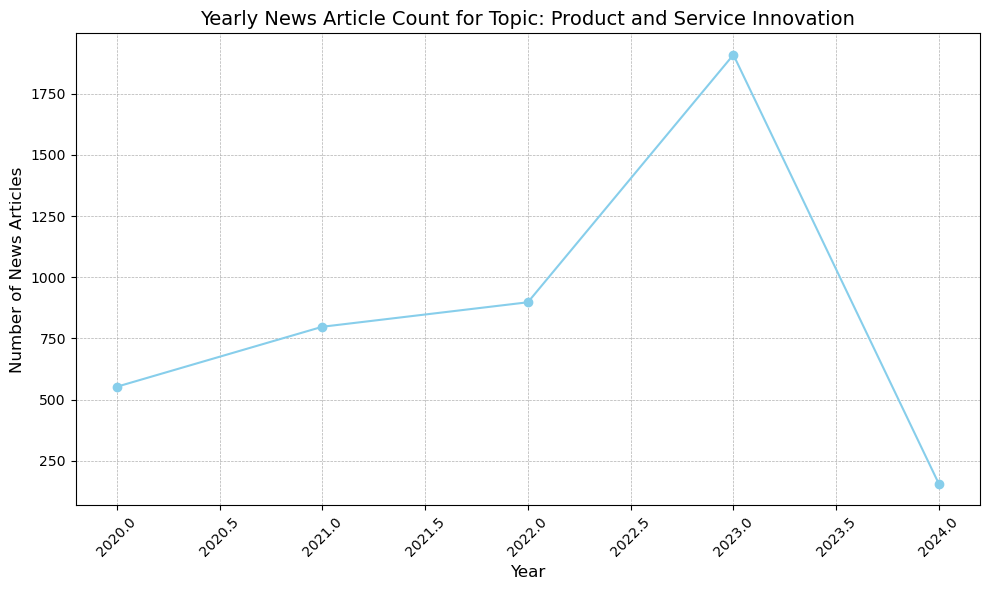

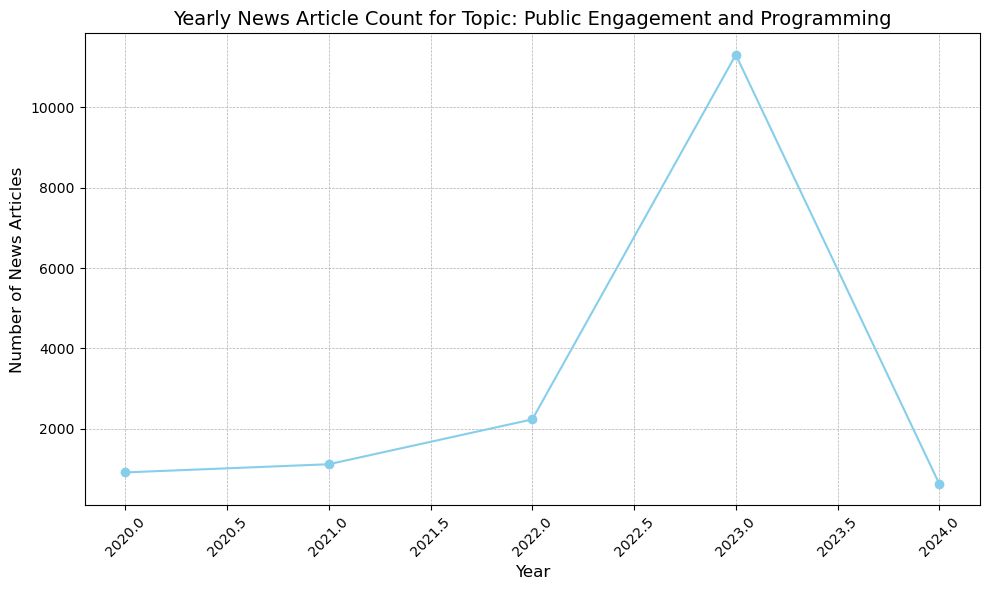

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

news_df_sample['date'] = pd.to_datetime(news_df_sample['date'])

news_df_sample['year'] = news_df_sample['date'].dt.year

topic_over_time_yearly = news_df_sample.groupby(['year', 'topic_name']).size().reset_index(name='count')

unique_topics = sorted(news_df_sample['topic_name'].unique())

for topic_name in unique_topics:
    topic_time_df = topic_over_time_yearly[topic_over_time_yearly['topic_name'] == topic_name]
    

    plt.figure(figsize=(10, 6))
    plt.plot(topic_time_df['year'], topic_time_df['count'], marker='o', linestyle='-', color='skyblue')
    

    plt.title(f'Yearly News Article Count for Topic: {topic_name}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of News Articles', fontsize=12)
    plt.xticks(rotation=45)  
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 그리드 추가
    plt.tight_layout()
    
 
    plt.show()


In [28]:
pip install wordcloud


python(14035) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/39/4a/2684863905b72fceea24edaa10e3e16bc742a184042f463f3b09883d75b0/wordcloud-1.9.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 2.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


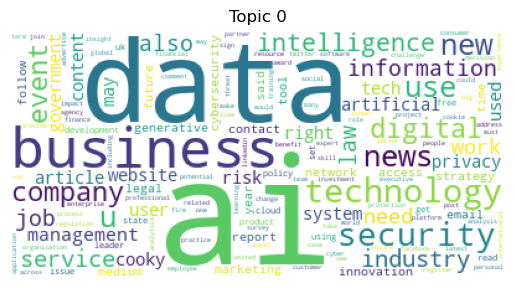

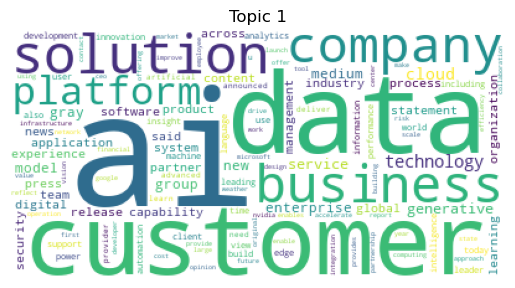

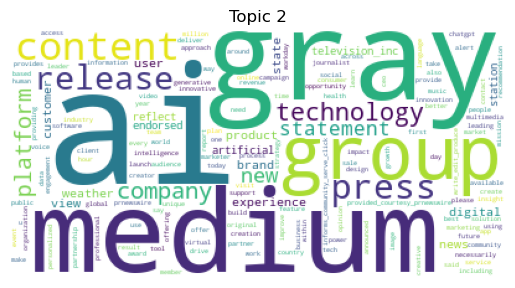

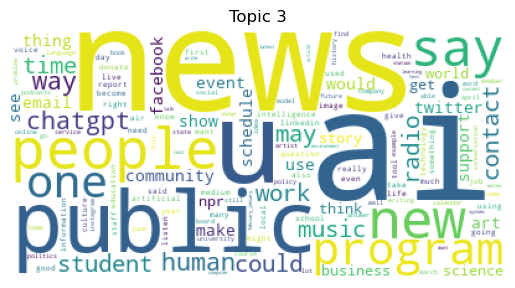

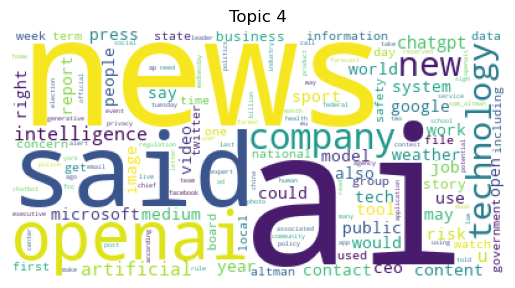

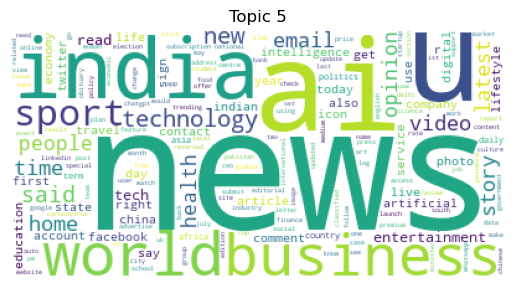

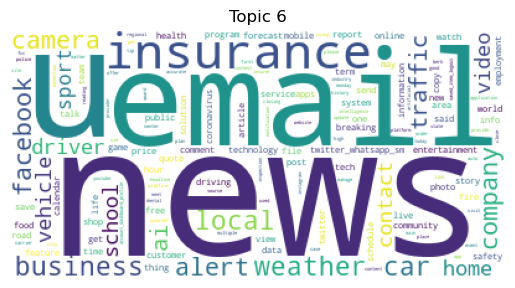

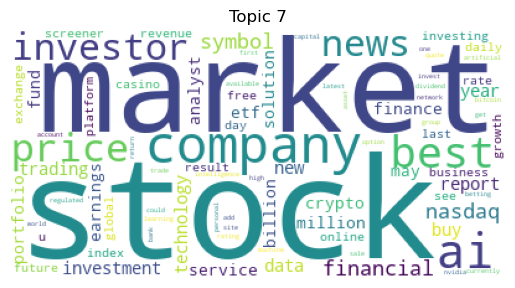

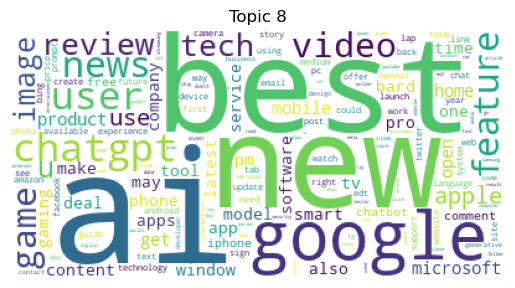

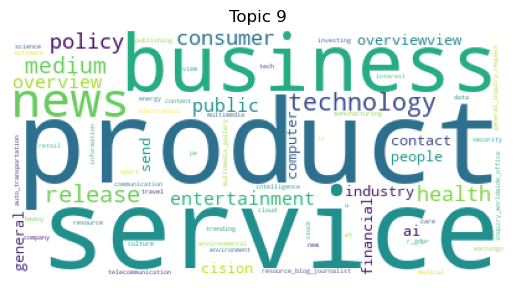

In [30]:
from wordcloud import WordCloud

# For each topic, create a word cloud based on the frequency of each term
for t in range(len(optimal_lda_model.show_topics(formatted=False))):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(optimal_lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title(f"Topic {t}")
    plt.show()


In [9]:
news_df = pd.read_parquet('news_df_sample.parquet', engine='pyarrow')


/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py:706: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


In [11]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Ensure pyLDAvis is enabled to work in Jupyter notebooks
pyLDAvis.enable_notebook()

# Preparing the visualization
# gensimvis.prepare expects the model, the corpus, and the dictionary as main arguments
lda_display = gensimvis.prepare(olm, corpus, dictionary, sort_topics=False)

# Display the visualization
pyLDAvis.display(lda_display)


NameError: name 'corpus' is not defined

In [34]:
news_df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195330 entries, 17886 to 124998
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   url             195330 non-null  object        
 1   date            195330 non-null  datetime64[ns]
 2   language        195330 non-null  object        
 3   title           195330 non-null  object        
 4   text            195330 non-null  object        
 5   clean_text      195330 non-null  object        
 6   tokens          195330 non-null  object        
 7   trigrams        195330 non-null  object        
 8   dominant_topic  195330 non-null  int64         
 9   topic_name      195330 non-null  object        
 10  year            195330 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 17.1+ MB


In [35]:
news_df_sample['url'].nunique()

195330

In [33]:
news_df_sample.head()

,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic,topic_name,year
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter all sharing option all sharing option all image generated google latest ai linkedin reddit pocket flipboard email there new hot trend ai generator feed program text theyll generate remarkably accurate picture match description they match ra...,"[all, image, generated, google, latest, ai, the, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, the, verge, filed, google, all, image, generated, google, latest, ai, imagen, else, thing, by, james, vincent, may, edt, story, facebook, twitter, all, sharing, option, all, sharing, option, all, image, generated, google, latest, ai, linkedin, reddit, pocket, flipboard, email, there, new, hot, trend, ai, generator, feed, program, text, theyll, gener...","[image, generated, google, latest, ai, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, verge, filed, google, image, generated, google, latest, ai, imagen, else, thing, james_vincent, may, edt, story, facebook, twitter, sharing, option, sharing, option, image, generated, google, latest, ai, linkedin, reddit, pocket_flipboard, email, new, hot, trend, ai, generator, feed, program, text, theyll, generate, remarkably, accurate, picture, match, descr...",3,Public Engagement and Programming,2022
193040,https://www.newsbreak.com/news/2635308733891/mit-engineers-develop-lego-inspired-artificial-intelligence-chip-that-can-be-stacked-and-reconfigured,2022-06-17,en,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreak,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreakSign inHomeLocalHeadlinesCoronavirusOriginalRecommendEntertainmentEntertainmentCelebritiesTV & VideosMusicMoviesVisual ArtTV SeriesBooks & LiteratureComicsTheater & DanceBehind Viral VideosPerforming ArtsTV ShowsPhotographyMuseumsDesignRock MusicHip HopPoliticsPoliticsU.S. PoliticsMilitaryCongress & CourtsElectionsLawPresidential ElectionImmigrationPOTUSForeign PolicyHealthHealthP...,mit engineer develop artificial intelligence chip that can stacked reconfigured newsbreaksign arttv seriesbooks dancebehind viral videosperforming artstv musichip healthhealth servicesmental healthdiseases healthcancerfood sportspremier drinkspetsbeauty safetypublic safetyaccidentslaw enforcementtraffic advicefamily rentlabor issuestrouble scienceearth scienceeducationhigh nationsmiddle location channel ic people inin this article mit engineer spherical robot light emitting diode backlit key...,"[mit, engineer, develop, artificial, intelligence, chip, that, can, stacked, reconfigured, newsbreaksign, arttv, seriesbooks, dancebehind, viral, videosperforming, artstv, musichip, healthhealth, servicesmental, healthdiseases, healthcancerfood, sportspremier, drinkspetsbeauty, safetypublic, safetyaccidentslaw, enforcementtraffic, advicefamily, rentlabor, issuestrouble, scienceearth, scienceeducationhigh

In [38]:
news_df_sample.to_parquet('news_df_sample.parquet')


/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt

In [8]:
news_df = pd.read_parquet('news_df_sample.parquet', engine='pyarrow')


/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py:706: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


In [9]:
news_df

,url,date,language,title,text,clean_text,tokens,trigrams,dominant_topic,topic_name,year
17886,https://www.theverge.com/2022/5/24/23139297/google-imagen-text-to-image-ai-system-examples-paper,2022-05-24,en,All these images were generated by Google’s latest text-to-image AI - The Verge,"\n\nAll these images were generated by Google’s latest text-to-image AI - The Verge\nSkip to main content\nclock\nmenu\nmore-arrow\nno\nyes\n\nSample images from Google’s new text-to-image AI. \nImage: Google (collage by The Verge)\nFiled under:\nGoogle\n\nAll these images were generated by Google’s latest text-to-image AI\nImagen what else this thing can do\n\n\n \n By\n \nJames Vincent\n May 24, 2022, 7:38am EDT\n\nShare this story\n\nShare this on Facebook\nShare this on Tw...",all image generated google latest ai the verge skip main content clock yes sample image google new ai image google collage the verge filed google all image generated google latest ai imagen else thing by james vincent may edt story facebook twitter all sharing option all sharing option all image generated google latest ai linkedin reddit pocket flipboard email there new hot trend ai generator feed program text theyll generate remarkably accurate picture match description they match ra...,"[all, image, generated, google, latest, ai, the, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, the, verge, filed, google, all, image, generated, google, latest, ai, imagen, else, thing, by, james, vincent, may, edt, story, facebook, twitter, all, sharing, option, all, sharing, option, all, image, generated, google, latest, ai, linkedin, reddit, pocket, flipboard, email, there, new, hot, trend, ai, generator, feed, program, text, theyll, gener...","[image, generated, google, latest, ai, verge, skip, main, content, clock, yes, sample, image, google, new, ai, image, google, collage, verge, filed, google, image, generated, google, latest, ai, imagen, else, thing, james_vincent, may, edt, story, facebook, twitter, sharing, option, sharing, option, image, generated, google, latest, ai, linkedin, reddit, pocket_flipboard, email, new, hot, trend, ai, generator, feed, program, text, theyll, generate, remarkably, accurate, picture, match, descr...",3,Public Engagement and Programming,2022
193040,https://www.newsbreak.com/news/2635308733891/mit-engineers-develop-lego-inspired-artificial-intelligence-chip-that-can-be-stacked-and-reconfigured,2022-06-17,en,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreak,MIT Engineers Develop LEGO-Inspired Artificial Intelligence Chip That Can be Stacked and Reconfigured - NewsBreakSign inHomeLocalHeadlinesCoronavirusOriginalRecommendEntertainmentEntertainmentCelebritiesTV & VideosMusicMoviesVisual ArtTV SeriesBooks & LiteratureComicsTheater & DanceBehind Viral VideosPerforming ArtsTV ShowsPhotographyMuseumsDesignRock MusicHip HopPoliticsPoliticsU.S. PoliticsMilitaryCongress & CourtsElectionsLawPresidential ElectionImmigrationPOTUSForeign PolicyHealthHealthP...,mit engineer develop artificial intelligence chip that can stacked reconfigured newsbreaksign arttv seriesbooks dancebehind viral videosperforming artstv musichip healthhealth servicesmental healthdiseases healthcancerfood sportspremier drinkspetsbeauty safetypublic safetyaccidentslaw enforcementtraffic advicefamily rentlabor issuestrouble scienceearth scienceeducationhigh nationsmiddle location channel ic people inin this article mit engineer spherical robot light emitting diode backlit key...,"[mit, engineer, develop, artificial, intelligence, chip, that, can, stacked, reconfigured, newsbreaksign, arttv, seriesbooks, dancebehind, viral, videosperforming, artstv, musichip, healthhealth, servicesmental, healthdiseases, healthcancerfood, sportspremier, drinkspetsbeauty, safetypublic, safetyaccidentslaw, enforcementtraffic, advicefamily, rentlabor, issuestrouble, scienceearth, scienceeducationhigh

In [10]:
def get_industry(topic_num):
  """
  Returns the corresponding industry group for a given topic number.
  """
  if topic_num in [0, 3, 4, 8]:
    return "AI Technology and Innovation"
  elif topic_num in [1, 2, 9]:
    return "Business Solutions and Customer Experience"
  elif topic_num in [5, 6, 10, 11]:
    return "News, Media, and Information"
  elif topic_num in [7, 12]:
    return "Finance and Markets"
  elif topic_num == 13:
    return "Healthcare"
  else:
    return "Uncategorized"

news_df['industry'] = news_df['dominant_topic'].apply(get_industry)


In [16]:
# 결측값 개수 확인
print(news_df['industry'].isnull().sum())

# 결측값 확인
print(news_df[news_df['industry'].isnull()])

0
Empty DataFrame
Columns: [url, date, language, title, text, clean_text, tokens, trigrams, dominant_topic, topic_name, year, industry]
Index: []


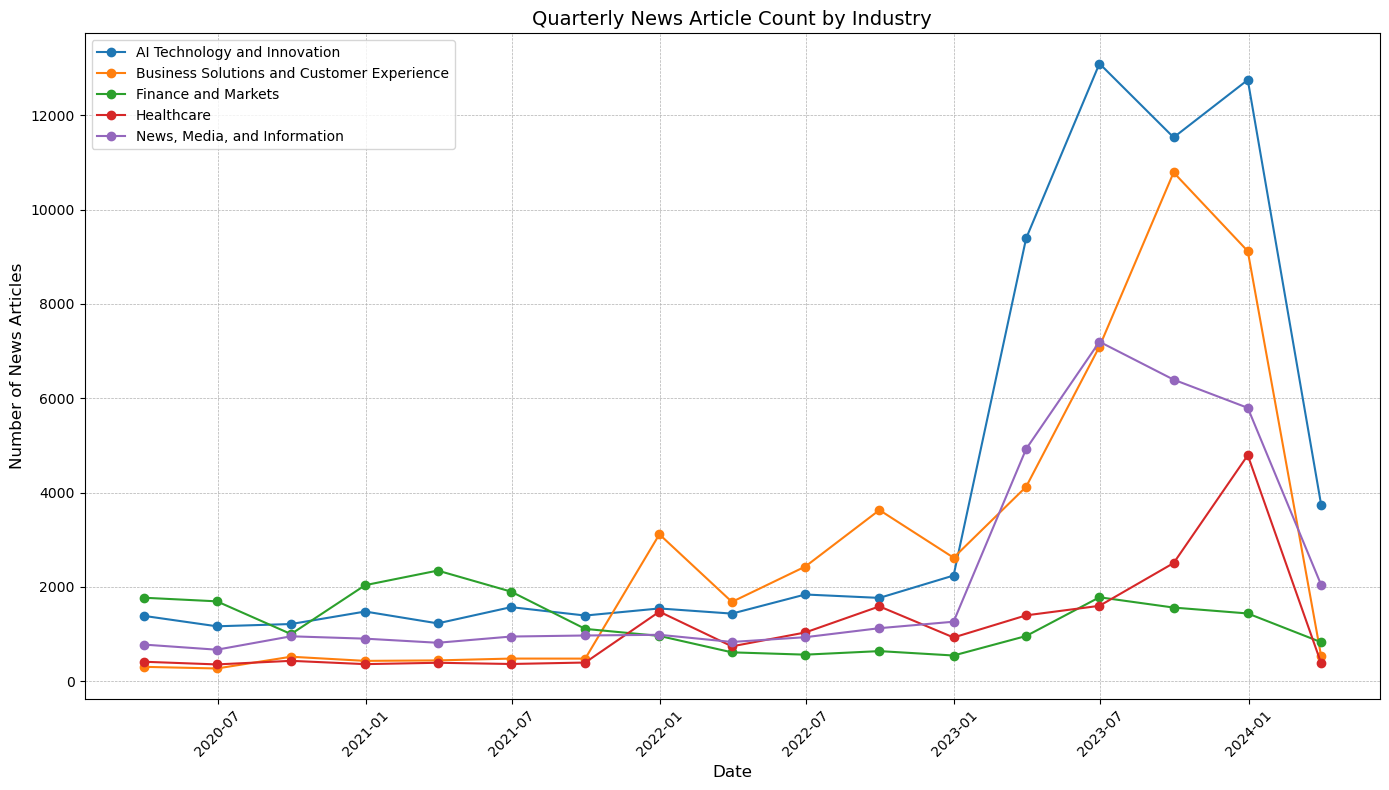

In [25]:


# 날짜 데이터를 datetime 형식으로 변환
news_df['date'] = pd.to_datetime(news_df['date'])

# 'date'를 기준으로 'industry'별로 그룹화하고, size()로 각 그룹의 크기를 계산
# 이후, 리샘플링을 통해 분기별 데이터로 집계
industry_over_time_quarterly = news_df.groupby([pd.Grouper(key='date', freq='Q'), 'industry']).size().reset_index(name='count')

# 유니크한 industry 리스트 생성 및 정렬
unique_industries = sorted(news_df['industry'].unique())

plt.figure(figsize=(14, 8))

for industry in unique_industries:
    industry_time_df = industry_over_time_quarterly[industry_over_time_quarterly['industry'] == industry]
    # 분기별 데이터를 플롯
    plt.plot(industry_time_df['date'], industry_time_df['count'], marker='o', linestyle='-', label=industry)

plt.title('Quarterly News Article Count by Industry', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of News Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best')
plt.tight_layout()

plt.show()


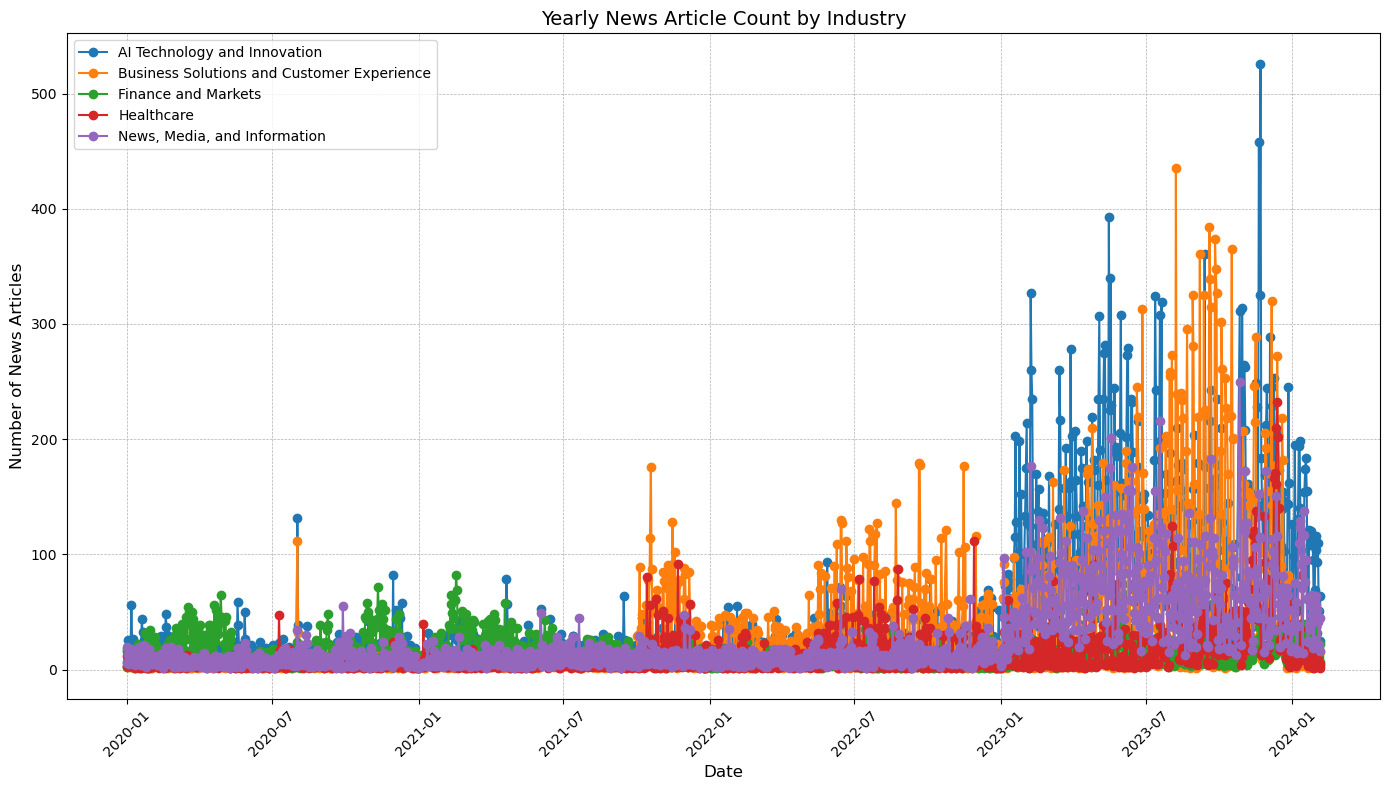

In [24]:
news_df['date'] = pd.to_datetime(news_df['date'])
# Industry별 연도별 뉴스 기사 수 계산
industry_over_time_yearly = news_df.groupby(['date', 'industry']).size().reset_index(name='count')

# 유니크한 industry 리스트 생성 및 정렬
unique_industries = sorted(news_df['industry'].unique())

plt.figure(figsize=(14, 8))

for industry in unique_industries:
  industry_time_df = industry_over_time_yearly[industry_over_time_yearly['industry'] == industry]
  plt.plot(industry_time_df['date'], industry_time_df['count'], 
           marker='o', linestyle='-', label=industry)

plt.title('Yearly News Article Count by Industry', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of News Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best')
plt.tight_layout()

plt.show()


In [22]:
news_df.to_parquet('news_df_sample.parquet')


/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/kyusungchokyusungcho/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dt